In [12]:
#pseudocode for line detection parameter optimization

import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [13]:
#Helper functions
def path_to_img(img_path):
    img = cv2.imread(img_path)
    return img

def show_image(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

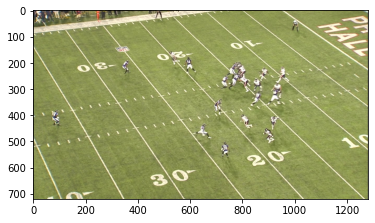

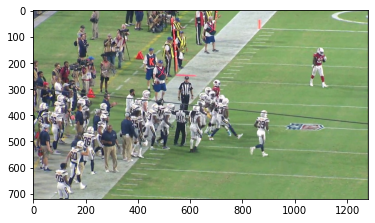

In [14]:
#load of test images
DIR_NFL = 'data/nfl-health-and-safety-helmet-assignment/' #base directory

image_filenames = ['images/57502_001570_Sideline_frame1395.jpg','images/57503_001581_Endzone_frame327.jpg']
images = list()
for im in image_filenames:
    tmp = DIR_NFL + im
    images.append(path_to_img(tmp))

#test plot
for im in images:
    show_image(im)

In [15]:
def main_procedure(img, hls_lower_color,hls_upper_color,hough_minLineLength,hough_maxLineGap,hough_minVotes):
    hls_img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    hls_mask = cv2.inRange(hls_img, hls_lower_color, hls_upper_color)
    
    res = cv2.bitwise_and(img,img, mask= hls_mask)
    gray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
    kernel_size = 5
    blur = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    low_threshold = 10
    high_threshold = 200
    edges = cv2.Canny(blur, low_threshold, high_threshold)
    dilated = cv2.dilate(edges, np.ones((2,2), dtype=np.uint8))

    lines_houghP = cv2.HoughLinesP(edges, 1, np.pi/180, hough_minVotes, hough_minLineLength, hough_maxLineGap)
    lines_hough = cv2.HoughLines(edges, 1, np.pi/180, hough_minVotes)

    return lines_houghP, lines_hough

def plot_hough(image,lines):
    img = image.copy()
    LINE_COLOR = (255, 0, 0) 
    print(len(lines))
    for l in lines:
        for r,theta in l:
            # Stores the value of cos(theta) in a
            a = np.cos(theta)
            # Stores the value of sin(theta) in b
            b = np.sin(theta)
            
            # x0 stores the value rcos(theta)
            x0 = a*r
            
            # y0 stores the value rsin(theta)
            y0 = b*r
            
            # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
            x1 = int(x0 + 10000*(-b))
            
            # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
            y1 = int(y0 + 10000*(a))
        
            # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
            x2 = int(x0 - 10000*(-b))
            
            # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
            y2 = int(y0 - 10000*(a))
            
            # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
            # (0,0,255) denotes the colour of the line to be 
            #drawn. In this case, it is red. 
            cv2.line(img,(x1,y1), (x2,y2), LINE_COLOR,5)


def plot_houghP(image,lines):
    img = image.copy()
    LINE_COLOR = (255, 0, 0) 
    for l in lines:
        for x1, y1, x2, y2 in l:
            # cv2.line(image, start_point, end_point, color, thickness)
            cv2.line(img, (x1,y1), (x2,y2), LINE_COLOR, 3)


    plt.imshow(img)
    plt.title('Probabilistic Hough Lines')
    plt.show()


In [16]:
#tresholds to optimize on
lower_lightness_tresholds = [150, 160, 180, 200]
hough_minLineLength_t = [10, 50, 100, 150, 200] # _t => tresholds (valori da sperimentare)
hough_maxLineGap_t = [0, 5, 10, 50, 100]
hough_minVotes_t = [50, 100, 150, 200, 400]



In [17]:
#static parameters
hls_upper_color = np.array([180,255,255])

In [30]:
#random selection of parameters
# in realtà vorremmo scorrere tutte le possibili combinazioni, e paragonarle una con l'altra

#random.choice() seleziona un elemento random dalla lista
hls_lower_color = np.array([0, random.choice(lower_lightness_tresholds), 0])
hough_minLineLength = random.choice(hough_minLineLength_t)
hough_maxLineGap = random.choice(hough_maxLineGap_t)
hough_minVotes = random.choice(hough_minVotes_t)

print('lightness treshold: ' , hls_lower_color[1])
print('min line lenght: ' ,hough_minLineLength)
print('max line gap: ' ,hough_maxLineGap)
print('hough votes required: ' ,hough_minVotes)

lightness treshold:  150
min line lenght:  200
max line gap:  100
hough votes required:  200


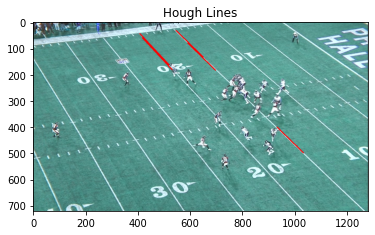

TypeError: 'NoneType' object is not iterable

In [31]:
#esecuzione della procedura e print delle quattro immagini (2 immagini * 2 tipi di hough)
for img in images:
    lines_houghP, lines_hough = main_procedure(img, hls_lower_color,hls_upper_color,hough_minLineLength,hough_maxLineGap,hough_minVotes)
    plot_houghP(img,lines_houghP)
    plot_hough(img,lines_hough)
